In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import bin_tools
from wotan import flatten
import time
from OrionPY import OrionTools, Tools
from multiprocessing import Pool

In [2]:
### REBINNED - Load data as numpy array 
data = np.load('/data/jpr64/rebinned_data_test.npy', allow_pickle = True)




In [3]:
### Remove nan and negative flux values

lc = []

for i in data:
    idx = (~np.isnan(i[:,1])) & (i[:,1] > 0.)
    i = i[idx]
    lc.append(i)

lc = [x for x in lc if not x.shape == (0,3)]
print(np.size(lc))
index_keep = [i for i, j in enumerate(lc) if not j.shape == (0,3) ]

8913


/home/jpr64/.conda/envs/orion_jake/lib/python3.7/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


In [4]:
### Detrend with Lowess

def detrend(lightcurve):
    flatten_lc, trend_lc = flatten(
        lightcurve[:,0],                 # Array of time values
        lightcurve[:,1],                 # Array of flux values
#         method='lowess',
        window_length = 0.1 ,    # The length of the filter window in units of ``time``
        break_tolerance = 0.5,    # Split into segments at breaks longer than that
        return_trend=True,    # Return trend and flattened light curve
        )
    return np.array((flatten_lc, trend_lc))

In [5]:
%%time

### Generates detrended lc


if __name__ == '__main__':
    with Pool(50) as p:
        lc_detrend_2 = p.map(detrend, lc)
        p.close()


CPU times: user 1.82 s, sys: 5.24 s, total: 7.06 s
Wall time: 26.2 s


In [35]:
index = 3400

original_time = lc[index][:,0]
original_flux = lc[index][:,1]
detrend_flux = lc_detrend_2[index][1]

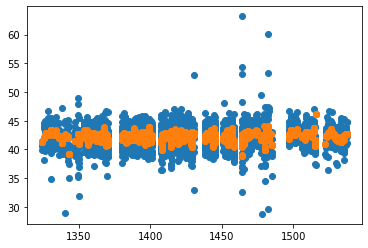

In [36]:
plt.scatter(original_time, original_flux)
plt.scatter(original_time, detrend_flux)
plt.show()

#### 